# How to Become a Data Scientist After You Graduate
## IST 652 Final Project
### Michelle Mak

# Overview
In this project, I will investigate the job market for Data Scientists in anticipation of my impending graduation. I will pinpoint optimal locations for potential jobs as well as define the most valuable skills to learn or highlight on my resume by comparing a collection of recent job postings.

# Data
The list provided is used to down sample the cities from which job positings are scraped on Indeed.com. 

Additional data is taken from Zillow Research to find the median rental prices, rent affordabilty score, and the price-to-income ration for each of the cities. These two variables will help determine whether the salary of the position offered is optimal for the location. 


In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

from collections import Counter

## Data Processing and Cleaning 

In [2]:
# READ IN DATA

# read in zillow data: median rental cost of one bedroom
rental_prices = pd.read_csv('City_MedianRentalPrice_1Bedroom.csv')
print(rental_prices.shape)

# read in zillow data: price-to-income ratio
pti_ratio = pd.read_csv('price-to-income.csv')
print(pti_ratio.shape)

# read in zillow data: rent affordability
rent = pd.read_csv('rent_affordability.csv')
print(rent.shape)

# read in jobs data
jobs = pd.read_csv('alldata.csv')
print(jobs.shape)
jobs.head()


(710, 113)
(370, 166)
(303, 166)
(6964, 6)


,Position,Company,Description,No_of_Reviews,Location,State
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,Atlanta,GA


In [3]:
# for Zillow data, keep only data from 2018
rental_prices.drop(rental_prices.iloc[:,2:101], inplace=True, axis=1)
pti_ratio.drop(pti_ratio.iloc[:,3:162], inplace=True, axis=1)
rent.drop(rent.iloc[:,3:162], inplace=True, axis=1)

print(rental_prices.shape)
print(pti_ratio.shape)
print(rent.shape)

(710, 14)
(370, 7)
(303, 7)


In [4]:
print(rental_prices.shape)
print(pti_ratio.shape)
print(rent.shape)


(710, 14)
(370, 7)
(303, 7)


In [5]:
# set format to 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format

# get the average of the most recent data and put into a new colum
rental_prices['avg_rent_price'] = rental_prices.iloc[:,3:14].mean(axis=1,skipna=True)

pti_ratio['avg_price-to-income'] = pti_ratio.iloc[:,4:7].mean(axis=1,skipna=True)


rent['avg_rent_aff_score'] = rent.iloc[:,4:7].mean(axis=1,skipna=True)


# drop remaining columns (so we only have the avg)
rental_prices.drop(rental_prices.iloc[:,2:14], inplace=True, axis=1)
pti_ratio.drop(pti_ratio.iloc[:,3:7], inplace=True, axis=1)
rent.drop(rent.iloc[:,3:7], inplace=True, axis=1)

print(rental_prices.head(1))
print(rental_prices.shape)

print(pti_ratio.head(1))
print(pti_ratio.shape)

print(rent.head(1))
print(rent.shape)

  RegionName State  avg_rent_price
0   New York    NY        2,354.00
(710, 3)
   RegionID     RegionName State  avg_price-to-income
0    102001  United States   NaN                 3.50
(370, 4)
   RegionID     RegionName State  avg_rent_aff_score
0    102001  United States   NaN                0.28
(303, 4)


##### code used to find out why columns weren't merging correctly
This revealed that the State column in pti_ratio and rent both had a leading white space

pti_ratio.State = pti_ratio.State.str.encode('utf-8')
rent.State = rent.State.str.encode('utf-8')
cities.State = cities.State.str.encode('utf-8')
rental_prices.State = rental_prices.State.str.encode('utf-8')


In [6]:
# strip column of extra white space
pti_ratio['State'] = pti_ratio['State'].str.strip()
rent['State'] = rent['State'].str.strip()

# drop irrelevant columns
pti_ratio.drop('RegionID', inplace=True, axis=1)
rent.drop('RegionID', inplace=True, axis=1)

# rename all city columns so that they are compatible
rental_prices = rental_prices.rename(columns={'RegionName':'Location'}, index=str)
pti_ratio = pti_ratio.rename(columns={'RegionName':'Location'}, index=str)
rent = rent.rename(columns={'RegionName':'Location'}, index=str)

# match all dtypes for index
rental_prices['Location'] = rental_prices['Location'].astype(str)
pti_ratio['Location'] = pti_ratio['Location'].astype(str)
rent['Location'] = rent['Location'].astype(str)
jobs['Location'] = jobs['Location'].astype(str)

rental_prices['State'] = rental_prices['State'].astype(str)
pti_ratio['State'] = pti_ratio['State'].astype(str)
rent['State'] = rent['State'].astype(str)
jobs['State'] = jobs['State'].astype(str)

# set index for each data set for merge
rental_prices=rental_prices.set_index(['Location', 'State'])
pti_ratio=pti_ratio.set_index(['Location', 'State'])
rent=rent.set_index(['Location', 'State'])
jobs=jobs.set_index(['Location', 'State'])

In [7]:
# merge datasets
df = pd.merge (rent, pti_ratio, how = 'left', on =['Location', 'State'])
df = pd.merge (df, rental_prices, how = 'left', on =['Location', 'State'])
df = pd.merge (jobs, df, how = 'left', on =['Location', 'State'])

print(df.shape)
df=df.reset_index()
df.head()

(6964, 7)


,Location,State,Position,Company,Description,No_of_Reviews,avg_rent_aff_score,avg_price-to-income,avg_rent_price
0,Atlanta,GA,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,nan,0.25,3.11,"1,566.55"
1,Atlanta,GA,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",nan,0.25,3.11,"1,566.55"
2,Atlanta,GA,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",nan,0.25,3.11,"1,566.55"
3,Atlanta,GA,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.00,0.25,3.11,"1,566.55"
4,Atlanta,GA,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.00,0.25,3.11,"1,566.55"


In [8]:
df.Location.unique()

array(['Atlanta', 'Austin', 'Round Rock', 'Cedar Park', 'nan', 'Boulder',
       'Boston', 'Chicago', 'Washington', 'Los Angeles', 'Cambridge',
       'Mountain View', 'Manhattan', 'New York', 'Jersey City', 'Newark',
       'Oakland', 'Bronx', 'Hoboken', 'Brooklyn', 'Rutherford', 'Union',
       'Rahway', 'Murray Hill', 'South Plainfield', 'Queens',
       'Little Falls', 'Florham Park', 'Troy Hills', 'Bloomfield',
       'Lynbrook', 'Allendale', 'Parsippany', 'West Orange', 'Kenilworth',
       'Ridgefield', 'Harrison', 'Montclair', 'Fort Lee', 'Carlstadt',
       'Orangeburg', 'Fairfield', 'Palisades', 'Hackensack', 'Roseland',
       'East Hanover', 'Long Beach', 'Whippany', 'Manhasset', 'Yonkers',
       'New Hyde Park', 'Secaucus', 'Port Washington', 'Staten Island',
       'Short Hills', 'Manhattanville', 'Woodcliff Lake', 'Redmond',
       'San Diego', 'Bedminster', 'New Brunswick', 'Seattle',
       'San Francisco', 'Redwood City', 'San Mateo', 'Berkeley',
       'San Francisc

In [9]:
df = df.fillna('unknown')

In [31]:
companies = Counter(df.Company).most_common()

# which city offers the most data science jobs?
pd.DataFrame(companies).head(21)


,0,1
0,Amazon.com,358
1,Ball Aerospace,187
2,Microsoft,137
3,Google,134
4,NYU Langone Health,77
5,Fred Hutchinson Cancer Research Center,70
6,KPMG,66
7,Lab126,50
8,Facebook,49
9,Broad Institute,49


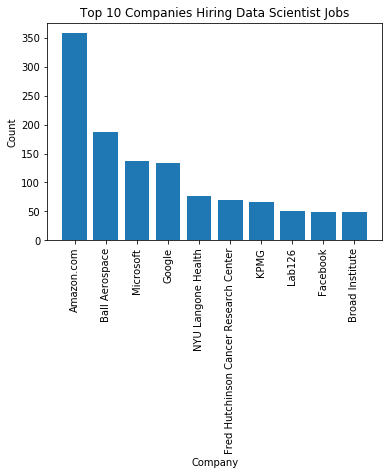

In [11]:
# plot
# separate the one list of tuples into two in order to plot
companies_10 = Counter(df.Company).most_common(10)
x, y = zip(*companies_10)  

plt.bar(x, y)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel("Company")
plt.title("Top 10 Companies Hiring Data Scientist Jobs")

plt.show()

In [12]:
# Limit to top 10 hiring companies
top_10_comps = df.loc[(df['Company'].isin(['Amazon.com', 'Ball Aerospace', 'Microsoft','Google', 'NYU Langone Health',
                                           'Fred Hutchinson Cancer Research Center', 'KPMG', 'Lab126', 'Facebook',
                                          'Broad Institute']))]

# Create a duplicate 'Location' column to feed the count aggregation 
top_10_comps['Count']=top_10_comps['Company']

# Group top 10 companies by location to find out in which cities these companies are hiring
where_hiring = top_10_comps.groupby(['Company','Location' ])['Count'].agg('count').reset_index()
where_hiring.head(10)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Company,Location,Count
0,Amazon.com,Atlanta,2
1,Amazon.com,Austin,2
2,Amazon.com,Boston,16
3,Amazon.com,Cambridge,50
4,Amazon.com,New York,13
5,Amazon.com,San Diego,3
6,Amazon.com,San Francisco,10
7,Amazon.com,Seattle,233
8,Amazon.com,Sunnyvale,29
9,Ball Aerospace,Boulder,187


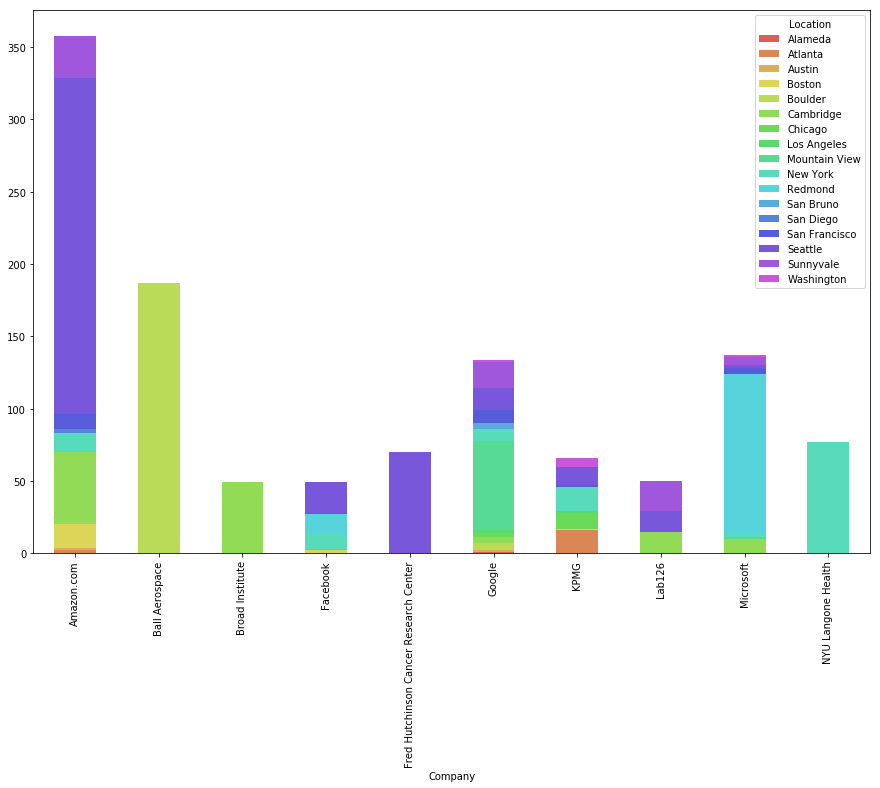

In [16]:
# PLOT
sns.set_palette(sns.color_palette("hls", 20))

where_hiring.pivot(index='Company',values='Count',columns='Location').plot(kind='bar',stacked=True,figsize=(15,10))
#plt.legend(loc = 'upper right')


In [23]:
most_jobs = Counter(df.Location).most_common()

# which city offers the most data science jobs?
print(most_jobs)


[('New York', 848), ('Seattle', 777), ('Cambridge', 694), ('Boston', 629), ('San Francisco', 564), ('Chicago', 471), ('San Diego', 412), ('Washington', 340), ('Mountain View', 277), ('Atlanta', 269), ('Sunnyvale', 256), ('Los Angeles', 254), ('Boulder', 251), ('Austin', 213), ('Redmond', 158), ('South San Francisco', 73), ('Redwood City', 59), ('Oakland', 35), ('Manhattan', 30), ('San Mateo', 30), ('San Francisco Bay Area', 26), ('Berkeley', 19), ('Emeryville', 19), ('Jersey City', 17), ('San Carlos', 16), ('Queens', 15), ('Brooklyn', 14), ('Menlo Park', 14), ('Foster City', 14), ('Novato', 12), ('nan', 11), ('Richmond', 10), ('Hayward', 10), ('Alameda', 10), ('Newark', 8), ('Burlingame', 8), ('Bronx', 7), ('San Rafael', 7), ('San Bruno', 7), ('Belmont', 5), ('Round Rock', 4), ('Murray Hill', 4), ('Parsippany', 4), ('San Ramon', 4), ('Union', 3), ('South Plainfield', 3), ('Hoboken', 2), ('Rahway', 2), ('Allendale', 2), ('Montclair', 2), ('Palisades', 2), ('San Leandro', 2), ('Walnut Cr

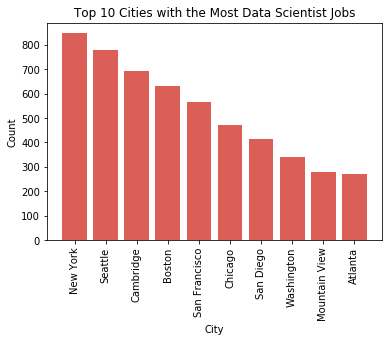

In [24]:
# plot
# separate the one list of tuples into two in order to plot
most_jobs_10 = Counter(df.Location).most_common(10)
x, y = zip(*most_jobs_10)  

plt.bar(x, y)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel("City")
plt.title("Top 10 Cities with the Most Data Scientist Jobs")

plt.show()

In [21]:
# Limit to top 10 hiring cities
top_10_cities = df.loc[(df['Location'].isin(['New York', 'Seattle', 'Cambridge','Boston', 'San Francisco',
                                           'Chicago', 'San Diego', 'Washington', 'Mountain View',
                                          'Atlanta']))]

# Create a duplicate 'Location' column to feed the count aggregation 
top_10_cities['Count']=top_10_cities['Location']

# Group top 10 companies by location to find out in which cities these companies are hiring
who_hiring = top_10_cities.groupby(['Location','Company' ])['Count'].agg('count').reset_index()
who_hiring.head(20)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Location,Company,Count
0,Atlanta,2M Research Services,1
1,Atlanta,ALS TDI,1
2,Atlanta,AMERICAN CANCER SOCIETY,2
3,Atlanta,Accenture,2
4,Atlanta,AirSage,1
5,Atlanta,Alaka`ina Foundation Family of Companies,1
6,Atlanta,"Alteryx, Inc.",1
7,Atlanta,Amazon.com,2
8,Atlanta,Analytic Recruiting,1
9,Atlanta,"Anthem, Inc.",3


In [26]:
# turn job count into a dataframe to merge with the main df
jobcount_df = pd.DataFrame(most_jobs)
#rename columns
jobcount_df = jobcount_df.rename(columns={jobcount_df.columns[0]: "Location",jobcount_df.columns[1]: "open_pos" }, index=str)
jobcount_df.head(16)


,Location,open_pos
0,New York,848
1,Seattle,777
2,Cambridge,694
3,Boston,629
4,San Francisco,564
5,Chicago,471
6,San Diego,412
7,Washington,340
8,Mountain View,277
9,Atlanta,269


In [27]:
df = pd.merge (df, jobcount_df, how = 'left', on =['Location'])
df.head()

,Location,State,Position,Company,Description,No_of_Reviews,avg_rent_aff_score,avg_price-to-income,avg_rent_price,open_pos
0,Atlanta,GA,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,unknown,0.25,3.11,"1,566.55",269
1,Atlanta,GA,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",unknown,0.25,3.11,"1,566.55",269
2,Atlanta,GA,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",unknown,0.25,3.11,"1,566.55",269
3,Atlanta,GA,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.00,0.25,3.11,"1,566.55",269
4,Atlanta,GA,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.00,0.25,3.11,"1,566.55",269


In [28]:
#df.to_csv('merged_df', sep='\t', encoding='utf-8')

In [124]:
city_vs_jobs = df.groupby(['Location','State','avg_rent_aff_score','avg_price-to-income','avg_rent_price'])['open_pos'].mean().reset_index()
city_vs_jobs=pd.DataFrame(city_vs_jobs)

pd.options.display.float_format = '{:,.2f}'.format
city_vs_jobs.head(10)


,Location,State,avg_rent_aff_score,avg_price-to-income,avg_rent_price,open_pos
0,Alameda,CA,unknown,unknown,unknown,10
1,Allendale,NJ,unknown,unknown,unknown,2
2,Atlanta,GA,0.25,3.11,"1,566.55",269
3,Austin,TX,0.27,3.95,"1,218.82",213
4,Bedminster,NJ,unknown,unknown,unknown,1
5,Belmont,CA,unknown,unknown,unknown,5
6,Berkeley,CA,unknown,unknown,unknown,19
7,Bloomfield,NJ,unknown,unknown,unknown,1
8,Boston,MA,0.32,5.12,"2,184.55",629
9,Boulder,CO,0.32,6.22,"1,592.91",251


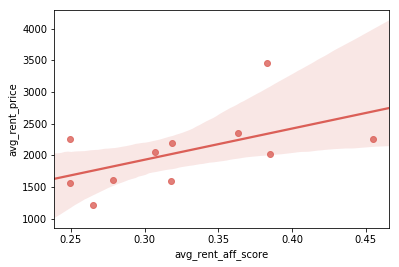

In [126]:
# mask 'unknowns' to find correlation 
cols = ['avg_rent_aff_score','avg_rent_price']
mask = city_vs_jobs[cols].applymap(lambda x: isinstance(x, (int, float)))

temp = city_vs_jobs
temp[cols]=temp[cols].where(mask)
temp[cols]=temp[cols].apply(pd.to_numeric)
temp.head()

sns.regplot(x='avg_rent_aff_score', y='avg_rent_price', data=temp, dropna=True)

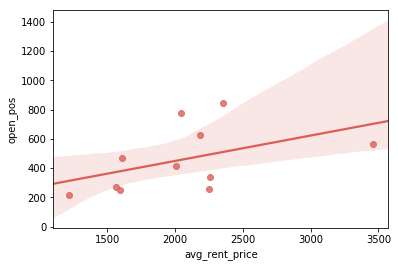

In [128]:
sns.regplot(x='avg_rent_price', y='open_pos', data=temp, dropna=True)

In [132]:
# Limit to top 16 hiring cities
cities_scatter = city_vs_jobs.loc[(city_vs_jobs['Location'].isin(['New York', 'Seattle', 'Cambridge','Boston', 'San Francisco',
                                                                  'Chicago', 'San Diego', 'Washington', 'Mountain View','Atlanta',
                                                                 'Sunnyvale','Los Angeles','Boulder','Austin','Redmond',
                                                                 'South San Francisco']))]
cities_scatter


,Location,State,avg_rent_aff_score,avg_price-to-income,avg_rent_price,open_pos
2,Atlanta,GA,0.25,3.11,"1,566.55",269
3,Austin,TX,0.27,3.95,"1,218.82",213
8,Boston,MA,0.32,5.12,"2,184.55",629
9,Boulder,CO,0.32,6.22,"1,592.91",251
13,Cambridge,MA,nan,unknown,nan,694
16,Chicago,IL,0.28,3.13,"1,608.18",471
35,Los Angeles,CA,0.46,8.86,"2,252.55",254
44,Mountain View,CA,nan,unknown,nan,277
48,New York,NY,0.36,5.49,"2,354.00",848
60,Redmond,WA,nan,unknown,nan,158


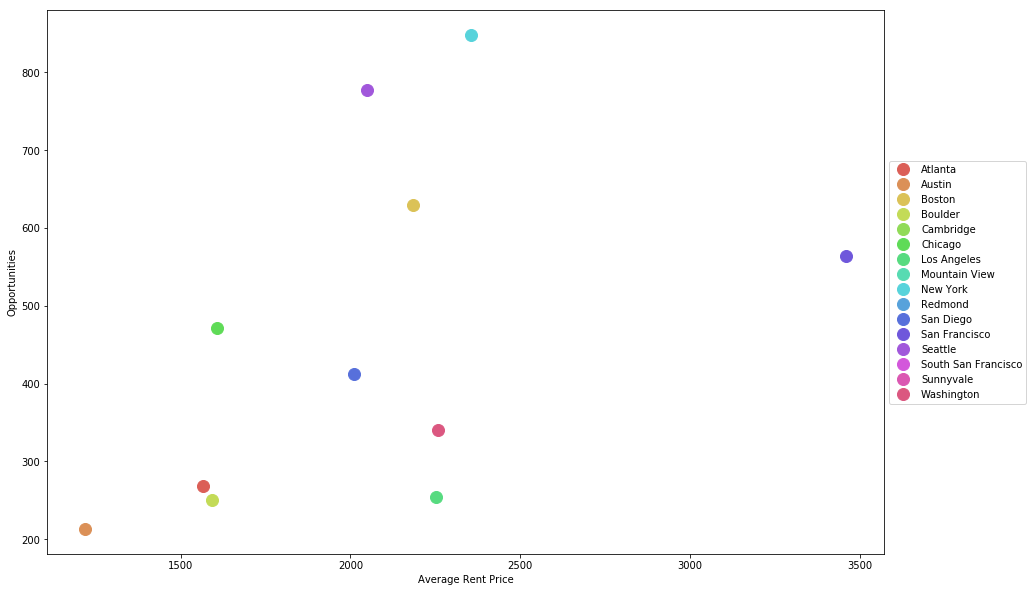

In [134]:
# create scatter plot of open positions  + rent affordability score based on location. 
groups = cities_scatter.groupby('Location')

# Plot
sns.set_palette(sns.color_palette("hls", 16))
fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.avg_rent_price, group.open_pos, marker='o', linestyle='', ms=12, label=name)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(xlabel="Average Rent Price", ylabel="Opportunities")

plt.show()

# Explore Job Descriptions

### What are the most important skills for a data scientist to have? 

In [144]:
import nltk
from nltk import FreqDist
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re

import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [69]:
# Create new dataframe of only job descriptions

text_df = df['Description']

# remove line breaks
text_df = text_df.replace('\n','', regex=True)
# make all words lower case
text_df = text_df.apply(lambda x: x.lower())
# remove punctuation
text_df = text_df.replace('[\$,--:"*/;.®()+&]', '', regex=True)
# remove all numbers
text_df = text_df.str.replace('\d+', '')
text_df.head()

0    development directorals therapy development in...
1    job descriptionthe road that leads to accompli...
2    growing company located in the atlanta ga area...
3    department program operationsposition location...
4    descriptionthe emory university department of ...
Name: Description, dtype: object

In [70]:
# Combine all cells into one

text= text_df.str.cat(sep='')
print(text[:110])

development directorals therapy development institute has an immediate opening for development directors repor


In [71]:
# Tokenize and remove stop words
stop_words = set(stopwords.words('english')) 
  
text_tokens = word_tokenize(text) 
  
filtered_text = [w for w in text_tokens if not w in stop_words] 
  
filtered_text = [] 
  
for w in text_tokens: 
    if w not in stop_words: 
        filtered_text.append(w) 
 
print(filtered_text[:100]) 

['development', 'directorals', 'therapy', 'development', 'institute', 'immediate', 'opening', 'development', 'directors', 'reporting', 'directly', 'senior', 'development', 'director', 'development', 'director', 'als', 'tdi', 'senior', 'fundraising', 'position', 'working', 'identifying', 'potential', 'prospects', 'cultivating', 'solicitation', 'strategies', 'closing', 'asks', 'donors', 'including', 'individuals', 'corporations', 'building', 'networks', 'via', 'events', 'generating', 'awareness', 'als', 'tdi', 'outreach', 'including', 'attending', 'speaking', 'events', 'well', 'personally', 'cultivates', 'relationships', 'patients', 'prospects', 'donors', 'position', 'responsible', 'generating', 'managing', 'portfolio', 'least', 'two', 'million', 'five', 'million', 'dollars', 'per', 'year', 'position', 'located', 'atlanta', 'garequirementsbachelor', "'s", 'degree', 'requiredminimum', 'years', "'", 'experience', 'fundraising', 'business', 'developmentsuccessful', 'track', 'recording', 'fu

Create frequency distribution of the top 50 words from the job descriptions.
Since the word frequency items are a pair of (word, frequency), use item[0] to get the word and item[1] to get the frequency. Printing the string ‘\t’ inserts a tab into the output, so that the frequency numbers line up.

In [151]:
fdist = FreqDist(filtered_text)
fdistkeys = list(fdist.keys())
fdistkeys[:50]

topkeys = fdist.most_common(50)
for pair in topkeys:
    print(pair)    

('data', 37735)
('experience', 19302)
('’', 17125)
('work', 16045)
('team', 14834)
('research', 13568)
('development', 11506)
('business', 11300)
('learning', 9092)
('new', 8939)
('years', 8918)
('science', 8808)
('skills', 8728)
('including', 8377)
('analysis', 7855)
('technical', 7568)
('machine', 7244)
('management', 7221)
('software', 7073)
('product', 6966)
('working', 6894)
('support', 6752)
('design', 6727)
('related', 6558)
('engineering', 6529)
('ability', 6216)
('degree', 6165)
('systems', 5684)
('opportunity', 5432)
('analytics', 5391)
('knowledge', 5354)
('information', 5344)
('solutions', 5309)
('company', 5186)
('teams', 5179)
('technology', 5053)
('using', 4865)
('clinical', 4846)
('status', 4842)
('scientists', 4815)
('us', 4742)
('project', 4674)
('communication', 4635)
('amp', 4583)
('develop', 4549)
('andor', 4529)
('products', 4526)
('position', 4491)
('across', 4467)
('computer', 4421)


In [78]:
# Normalize top frequency words
numwords = len(filtered_text)

# divide each freq (count) by the total number of words
topkeysnormalized = [(word, freq / numwords) for (word, freq) in topkeys]
for pair in topkeysnormalized:
    print(pair)

('data', 0.016146548271482805)
('experience', 0.008259193712366797)
('’', 0.007327670310034265)
('work', 0.006865545700700718)
('team', 0.006347367087827638)
('research', 0.0058056543513310905)
('development', 0.004923338662029446)
('business', 0.004835192671730639)
('learning', 0.0038904045815376085)
('new', 0.003824936928548689)
('years', 0.0038159511722560924)
('science', 0.003768882925009157)
('skills', 0.0037346514724659313)
('including', 0.003584460974432528)
('analysis', 0.00336110074658798)
('technical', 0.0032382954105891577)
('machine', 0.003099658027789093)
('management', 0.003089816485182916)
('software', 0.0030264882979779482)
('product', 0.0029807037302013836)
('working', 0.0029498954229124803)
('support', 0.002889134594648255)
('design', 0.0028784372657284967)
('related', 0.0028061233222309323)
('engineering', 0.002793714420684013)
('ability', 0.0026597838626086423)
('degree', 0.0026379613116123356)
('systems', 0.0024321447031961907)
('opportunity', 0.0023243156276850294

In [150]:
fdist = FreqDist(filtered_text)
keyword_list = ['python', 'r', 'excel', 'mongodb','tableau','code','regression','ggplot',
               'textmining', 'mining', 'datamining', 'sql', 'database', 'security', 'visualization',
               'scripting', 'analytics', 'bi']

for word in keyword_list:
    print (word + ":", fdist[word])


python: 2909
r: 1905
excel: 1017
mongodb: 98
tableau: 445
code: 1322
regression: 517
ggplot: 33
textmining: 1
mining: 1040
datamining: 18
sql: 1708
database: 1258
security: 2165
visualization: 1019
scripting: 591
analytics: 5391
bi: 294


In [153]:
# Normalize
numwords = len(filtered_text)

fdist = FreqDist(filtered_text)
keyword_list = ['python', 'r', 'excel', 'mongodb','tableau','code','regression','ggplot',
               'textmining', 'mining', 'datamining', 'sql', 'database', 'security', 'visualization',
               'scripting', 'analytics', 'bi']

for word in keyword_list:
    print (word + ":", fdist[word]/numwords)


python: 0.001244741193103047
r: 0.0008151364636855635
excel: 0.0004351673404557576
mongodb: 4.1933529365451566e-05
tableau: 0.00019041245477169333
code: 0.0005656747532768058
regression: 0.0002212207620605965
ggplot: 1.412047417408063e-05
textmining: 4.278931567903221e-07
mining: 0.000445008883061935
datamining: 7.702076822225798e-06
sql: 0.0007308415117978701
database: 0.0005382895912422252
security: 0.0009263886844510473
visualization: 0.0004360231267693382
scripting: 0.00025288485566308036
analytics: 0.002306772008256626
bi: 0.0001258005880963547


# Investigate Bigrams

In [79]:
# setup for bigrams and bigram measures
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [80]:
# create the bigram finder and score the bigrams by frequency for SandS
finder = BigramCollocationFinder.from_words(filtered_text)
scored = finder.score_ngrams(bigram_measures.raw_freq)

# scored is a list of bigram pairs with their score
print(type(scored))
first = scored[0]
print(type(first))
print(first)

<class 'list'>
<class 'tuple'>
(('machine', 'learning'), 0.002764617686022271)


In [81]:
# scores are sorted in decreasing frequency
for bscore in scored[:50]:
    print (bscore)

(('machine', 'learning'), 0.002764617686022271)
(('data', 'science'), 0.001353853948084579)
(('computer', 'science'), 0.0011668646385672083)
(('years', 'experience'), 0.0010889880840313697)
(('equal', 'opportunity'), 0.0010380687983733213)
(('sexual', 'orientation'), 0.0009019987745139989)
(('national', 'origin'), 0.0009002872018868377)
(('gender', 'identity'), 0.0008536468477966926)
(('data', 'scientists'), 0.0008125691047448216)
(('veteran', 'status'), 0.0007513803833238056)
(('communication', 'skills'), 0.000723995221289225)
(('data', 'analysis'), 0.0007235673281324347)
(('’', 'degree'), 0.0007231394349756443)
(('big', 'data'), 0.0007201441828781121)
(('race', 'color'), 0.0006889079824324185)
(('data', 'scientist'), 0.0006752154014151283)
(('opportunity', 'employer'), 0.000670936469847225)
(('without', 'regard'), 0.0005947714879385477)
(('qualified', 'applicants'), 0.0005866415179595315)
(("'s", 'degree'), 0.00046597564774466073)
(('related', 'field'), 0.0004646919682742898)
(('colo

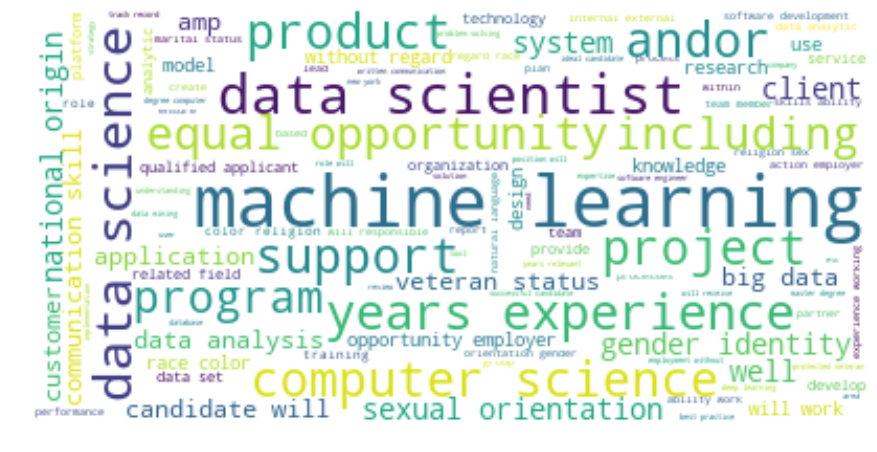

In [93]:
# Generate a wordcloud
wordcloud = WordCloud(background_color="white", max_words=1000).generate(text)

# Plot
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


(-0.5, 399.5, 199.5, -0.5)

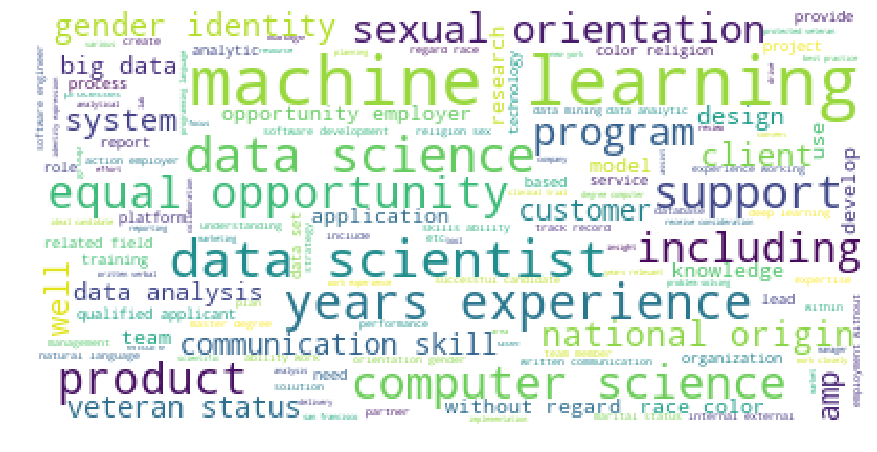

In [98]:
# remove more obvious stop words
stopwords = nltk.corpus.stopwords.words('english')
new_words = ('data  scientist', 'years  experience', 'sexual orientation', 'equal  opportunity', 'andor', 'project',
            'national origin', 'gender  identity')
for i in new_words:
    stopwords.append(i)

wordcloud = WordCloud(background_color ='white', 
                      stopwords = stopwords).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
 